In [1]:
import numpy as np
import pandas as pd 
import itertools
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller,kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error



In [2]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'


In [3]:
#Importing Training Dataset
train = pd.read_csv('C:/Users/sures/Downloads/predice-el-futuro/train_csv.csv')
train.head()

,id,time,feature
0,0,2019-03-19 00:00:00,237.97
1,1,2019-03-19 00:00:10,57.93
2,2,2019-03-19 00:00:20,90.53
3,3,2019-03-19 00:00:30,260.75
4,4,2019-03-19 00:00:40,49.70


In [4]:
#Train Data Shape
train.shape

(80, 3)

In [5]:
#Checking Null Values in train dataset
train.isnull().sum()

id         0
time       0
feature    0
dtype: int64

In [6]:
#Checking Data Types
train.dtypes

id           int64
time        object
feature    float64
dtype: object

In [7]:
#Converting time object to datetime
train['time']= pd.to_datetime(train['time']) 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 3 columns):
id         80 non-null int64
time       80 non-null datetime64[ns]
feature    80 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.0 KB


In [8]:
#Min time
train['time'].min()

Timestamp('2019-03-19 00:00:00')

In [9]:
#Max time
train['time'].max()

Timestamp('2019-03-19 00:13:10')

In [10]:
# Checking Anomalies by using Describe 
train.describe()

,id,feature
count,80.0000,80.000000
mean,39.5000,147.496375
std,23.2379,96.846260
min,0.0000,21.360000
25%,19.7500,66.730000
50%,39.5000,125.240000
75%,59.2500,199.820000
max,79.0000,469.720000


In [11]:
# Removing id column
train=train.drop(columns='id',axis=1)

In [12]:
train.head()

,time,feature
0,2019-03-19 00:00:00,237.97
1,2019-03-19 00:00:10,57.93
2,2019-03-19 00:00:20,90.53
3,2019-03-19 00:00:30,260.75
4,2019-03-19 00:00:40,49.70


In [13]:
# Indexing with time series data
train = train.set_index('time')
train.index

DatetimeIndex(['2019-03-19 00:00:00', '2019-03-19 00:00:10',
               '2019-03-19 00:00:20', '2019-03-19 00:00:30',
               '2019-03-19 00:00:40', '2019-03-19 00:00:50',
               '2019-03-19 00:01:00', '2019-03-19 00:01:10',
               '2019-03-19 00:01:20', '2019-03-19 00:01:30',
               '2019-03-19 00:01:40', '2019-03-19 00:01:50',
               '2019-03-19 00:02:00', '2019-03-19 00:02:10',
               '2019-03-19 00:02:20', '2019-03-19 00:02:30',
               '2019-03-19 00:02:40', '2019-03-19 00:02:50',
               '2019-03-19 00:03:00', '2019-03-19 00:03:10',
               '2019-03-19 00:03:20', '2019-03-19 00:03:30',
               '2019-03-19 00:03:40', '2019-03-19 00:03:50',
               '2019-03-19 00:04:00', '2019-03-19 00:04:10',
               '2019-03-19 00:04:20', '2019-03-19 00:04:30',
               '2019-03-19 00:04:40', '2019-03-19 00:04:50',
               '2019-03-19 00:05:00', '2019-03-19 00:05:10',
               '2019-03-

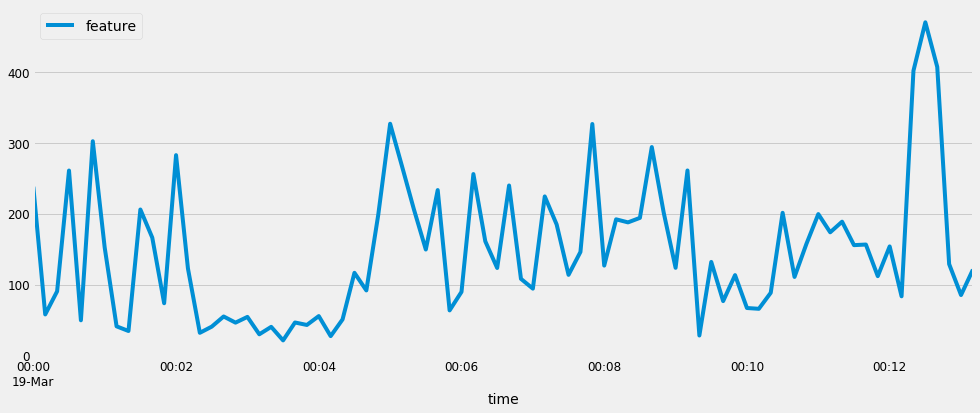

In [16]:
# Time series data visualization
train.plot(figsize=(15, 6))
plt.show()

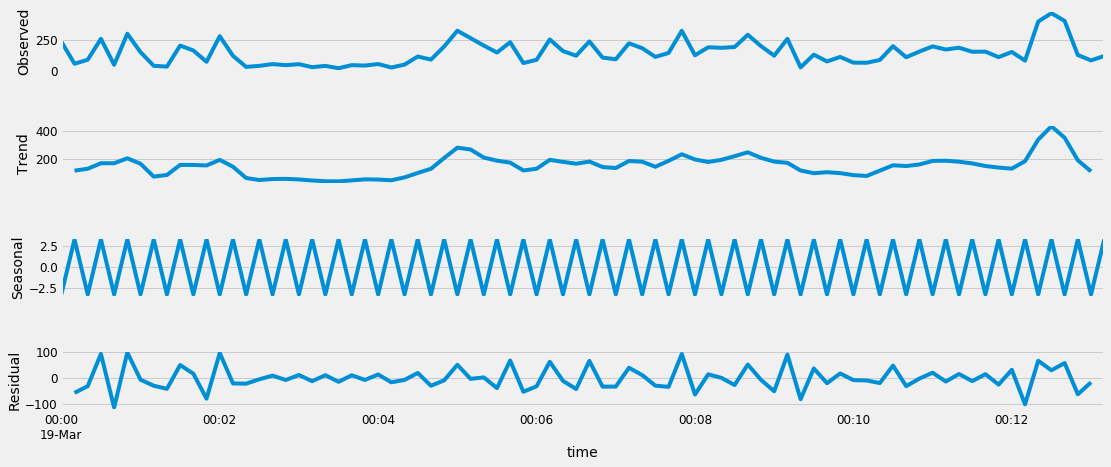

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal = seasonal_decompose(train, freq=2)
fig = seasonal.plot();
fig.set_size_inches(18,8)

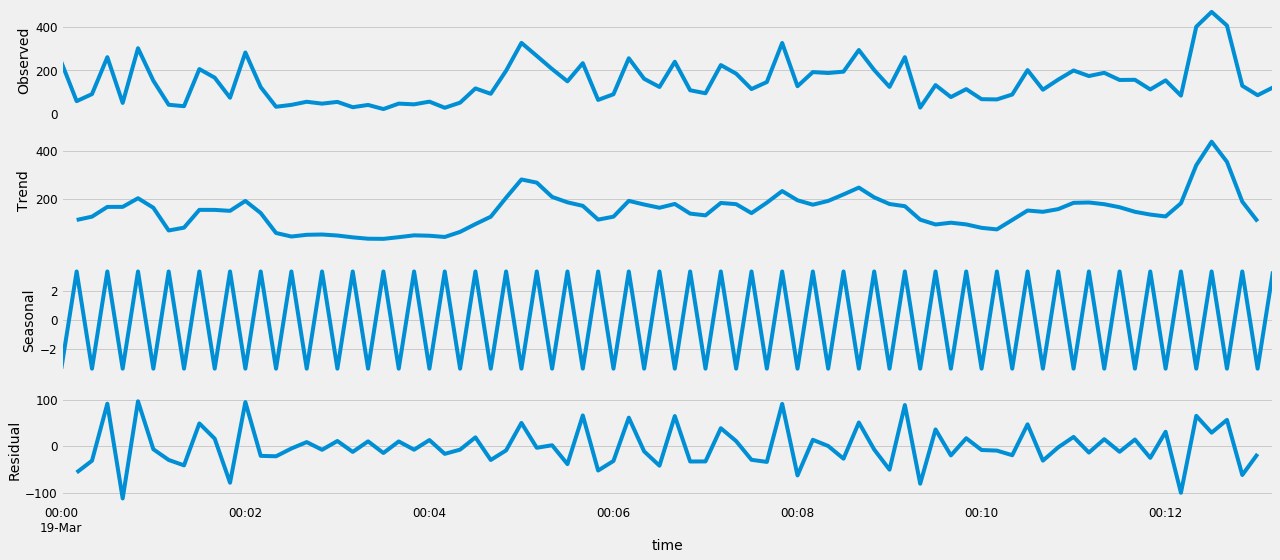

In [18]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

sarimax = sm.tsa.seasonal_decompose(train, model='additive',freq=2)
fig = sarimax.plot()
plt.show()

In [19]:
# Dickey Fuller Test
adfinput = adfuller(train['feature'])
adftest = pd.Series(adfinput[0:4], index=['Dickey Fuller Statistical Test', 'P-value',
                                          'Used Lags', 'Number of comments used'])
adftest = round(adftest,4)
    
for key, value in adfinput[4].items():
    adftest["Critical Value (%s)"%key] = value.round(4) 
adftest

Dickey Fuller Statistical Test    -5.9459
P-value                            0.0000
Used Lags                          0.0000
Number of comments used           79.0000
Critical Value (1%)               -3.5160
Critical Value (5%)               -2.8989
Critical Value (10%)              -2.5867
dtype: float64

In [20]:
# Kwiatkowski–Phillips–Schmidt–Shin (KPSS) tests
kpss_input = kpss(train['feature'])
kpss_test = pd.Series(kpss_input[0:3], index=['Statistical Test KPSS', 'P-Value', 'Used Lags'])
kpss_test = round(kpss_test,4)
    
for key, value in kpss_input[3].items():
    kpss_test["Critical Value (%s)"%key] = value 
kpss_test

Statistical Test KPSS     0.2827
P-Value                   0.1000
Used Lags                12.0000
Critical Value (10%)      0.3470
Critical Value (5%)       0.4630
Critical Value (2.5%)     0.5740
Critical Value (1%)       0.7390
dtype: float64

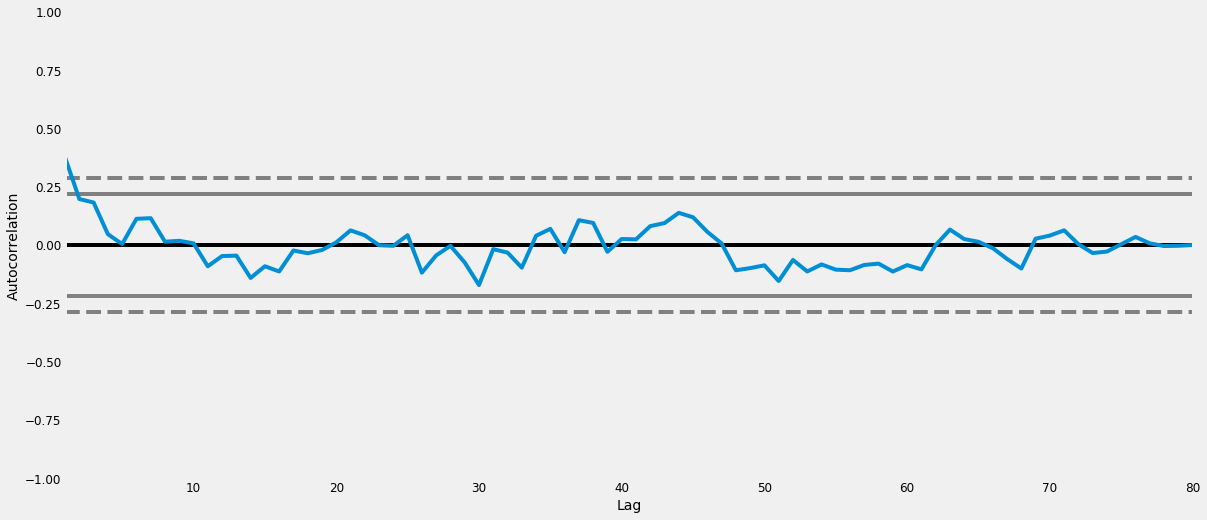

In [21]:
#Autocorrelation Plot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(train['feature'])
plt.show()

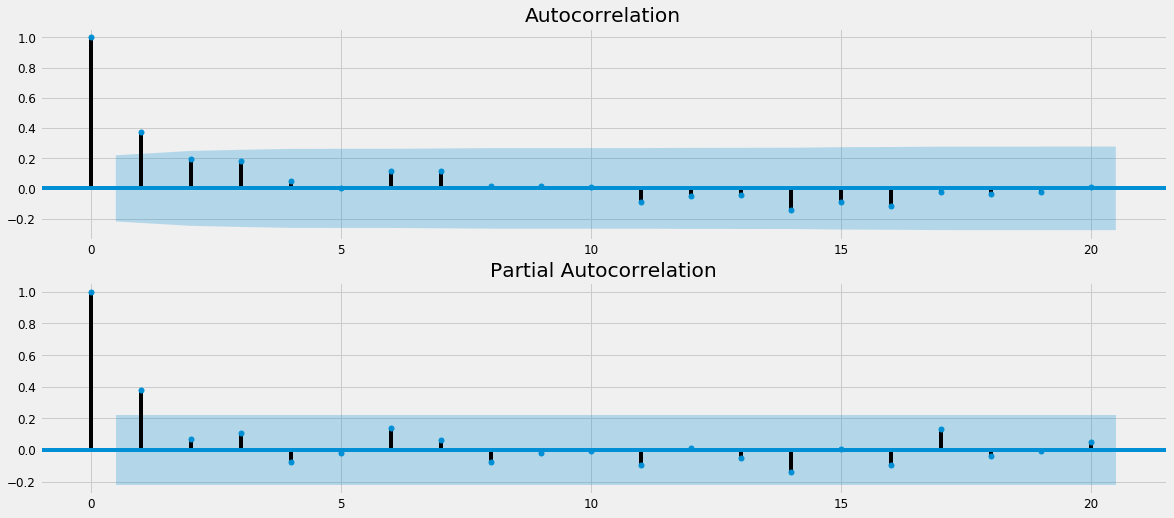

In [22]:
# ACF and PACF Plots
from pandas import read_csv
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure()
pyplot.subplot(211)
plot_acf(train, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(train, ax=pyplot.gca())
pyplot.show()

In [23]:
s = p = b = range(0, 2)
spb = list(itertools.product(s, p, b))
seasonal_spb = [(x[0], x[1], x[2], 12) for x in list(itertools.product(s, p, b))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(spb[1], seasonal_spb[1]))
print('SARIMAX: {} x {}'.format(spb[1], seasonal_spb[2]))
print('SARIMAX: {} x {}'.format(spb[2], seasonal_spb[3]))
print('SARIMAX: {} x {}'.format(spb[2], seasonal_spb[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [24]:
for param in spb:
    for param_seasonal in seasonal_spb:
        try:
            model = sm.tsa.statespace.SARIMAX(train['feature'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = model.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1042.4035372531396
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:865.3374454694667
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:848.4679420620186
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:680.1241081994293
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:856.5691270639311
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:834.0048626489337
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:696.4451555075179
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:682.8849026061968
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:988.1740013827845
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:821.6035769113862
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:827.6027531430348
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:663.1898764125592
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:840.3962302357431
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:816.3934247686946
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:691.7023215614124
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:664.5347022243453
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:951.5451699616596
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:793.1447566476651
ARIMA(0, 

In [25]:
model = sm.tsa.statespace.SARIMAX(train['feature'],
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = model.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4032      0.125      3.218      0.001       0.158       0.649
ma.L1         -1.0000      0.200     -4.998      0.000      -1.392      -0.608
ma.S.L12      -0.6355      0.239     -2.661      0.008      -1.104      -0.167
sigma2      1.091e+04   1.83e-05   5.95e+08      0.000    1.09e+04    1.09e+04


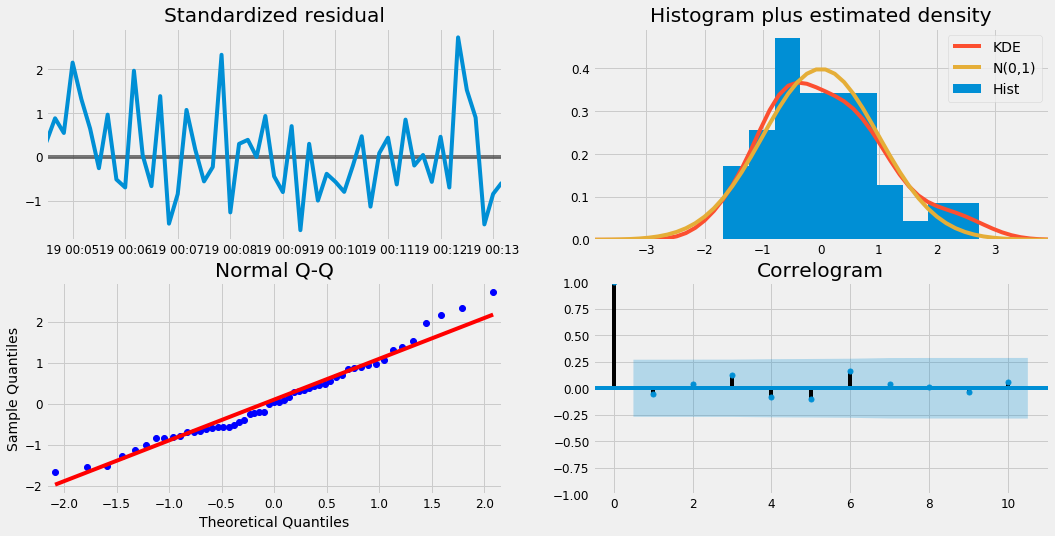

In [26]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

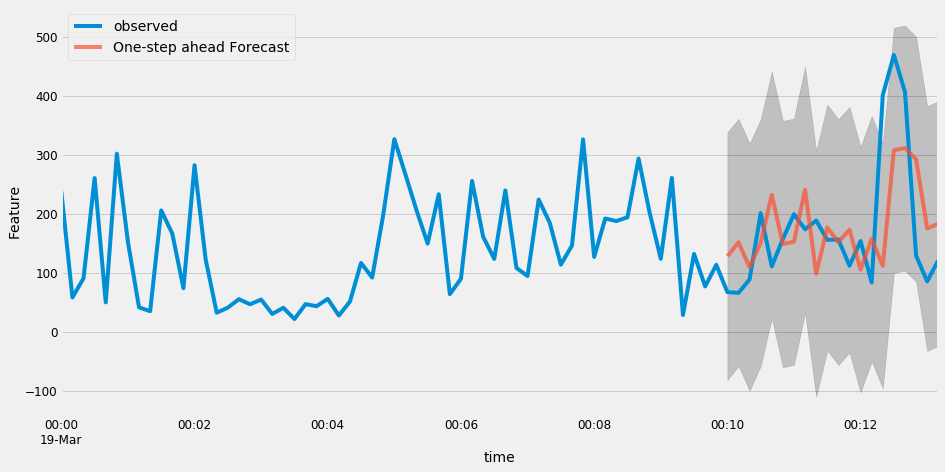

In [27]:
pred_dt = results.get_prediction(start=pd.to_datetime('2019-03-19 00:10:00'), dynamic=False)
pred_ci = pred_dt.conf_int()

ax = train['feature'].plot(label='observed')
pred_dt.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('time')
ax.set_ylabel('Feature')
plt.legend()

plt.show()


In [28]:
predicted = pred_dt.predicted_mean
truth = train['feature']['2019-03-19 00:10:00':]

# Compute the mean square error
mse = ((predicted- truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 10686.49


In [29]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))


The Root Mean Squared Error of our forecasts is 103.38


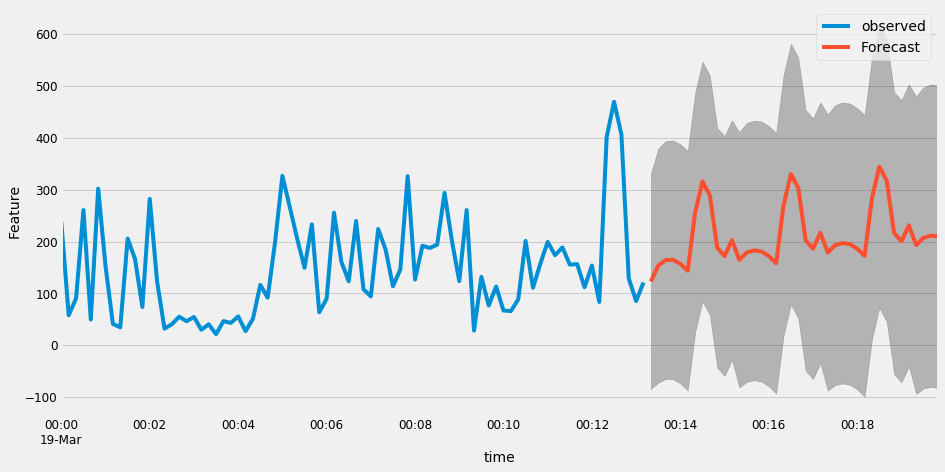

In [30]:
pred_uc = results.get_forecast(steps=40)
pred_ci = pred_uc.conf_int()

ax = train['feature'].plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('time')
ax.set_ylabel('Feature')

plt.legend()
plt.show()

In [31]:
pred_uc.predicted_mean

2019-03-19 00:13:20    123.262260
2019-03-19 00:13:30    153.652306
2019-03-19 00:13:40    164.341356
2019-03-19 00:13:50    164.946408
2019-03-19 00:14:00    157.037082
2019-03-19 00:14:10    143.829860
2019-03-19 00:14:20    255.458685
2019-03-19 00:14:30    316.004869
2019-03-19 00:14:40    289.162267
2019-03-19 00:14:50    188.206712
2019-03-19 00:15:00    171.997678
2019-03-19 00:15:10    202.927763
2019-03-19 00:15:20    164.722404
2019-03-19 00:15:30    178.844548
2019-03-19 00:15:40    182.974485
2019-03-19 00:15:50    180.934945
2019-03-19 00:16:00    171.959335
2019-03-19 00:16:10    158.322195
2019-03-19 00:16:20    269.777680
2019-03-19 00:16:30    330.253974
2019-03-19 00:16:40    303.383194
2019-03-19 00:16:50    202.416276
2019-03-19 00:17:00    186.202662
2019-03-19 00:17:10    217.130900
2019-03-19 00:17:20    178.924796
2019-03-19 00:17:30    193.046640
2019-03-19 00:17:40    197.176456
2019-03-19 00:17:50    195.136867
2019-03-19 00:18:00    186.161238
2019-03-19 00:

In [32]:
# Converting y_pred to a dataframe which is an array
pred_test= pd.DataFrame(pred_uc.predicted_mean)

In [33]:
pred_test.rename(columns={0: 'feature'}, inplace=True)
pred_test


,feature
2019-03-19 00:13:20,123.262260
2019-03-19 00:13:30,153.652306
2019-03-19 00:13:40,164.341356
2019-03-19 00:13:50,164.946408
2019-03-19 00:14:00,157.037082
2019-03-19 00:14:10,143.829860
2019-03-19 00:14:20,255.458685
2019-03-19 00:14:30,316.004869
2019-03-19 00:14:40,289.162267
2019-03-19 00:14:50,188.206712


In [35]:
#Reset Index
pred_test = pred_test.reset_index(drop=True)

In [36]:
pred_test

,feature
0,123.262260
1,153.652306
2,164.341356
3,164.946408
4,157.037082
5,143.829860
6,255.458685
7,316.004869
8,289.162267
9,188.206712


In [37]:
# Testing Data
test=pd.read_csv('C:/Users/sures/Downloads/predice-el-futuro/test_csv.csv')
test.head()

,id,time
0,80,2019-03-19 00:13:20
1,81,2019-03-19 00:13:30
2,82,2019-03-19 00:13:40
3,83,2019-03-19 00:13:50
4,84,2019-03-19 00:14:00


In [38]:
# Converting time object to datetime
test['time']= pd.to_datetime(test['time']) 
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
id      40 non-null int64
time    40 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 768.0 bytes


In [39]:
#Adding two Dataframes
test_pred = pd.concat([test, pred_test], axis=1)

In [40]:
test_pred

,id,time,feature
0,80,2019-03-19 00:13:20,123.262260
1,81,2019-03-19 00:13:30,153.652306
2,82,2019-03-19 00:13:40,164.341356
3,83,2019-03-19 00:13:50,164.946408
4,84,2019-03-19 00:14:00,157.037082
5,85,2019-03-19 00:14:10,143.829860
6,86,2019-03-19 00:14:20,255.458685
7,87,2019-03-19 00:14:30,316.004869
8,88,2019-03-19 00:14:40,289.162267
9,89,2019-03-19 00:14:50,188.206712


In [41]:
# saving test dataset with prediction into file
test_pred.to_csv('C:/Users/sures/Downloads/predice-el-futuro/test_pred1.csv',index=False)